# CNN Model Training on CIFAR-10 Dataset

The CIFAR-10 dataset is a collection of images used for image recognition and consists of 60,000 color images, each 32x32 pixels, distributed across 10 distinct classes, with each class contributing 6,000 images. The dataset is partitioned into a set of 50,000 images for training and 10,000 images designated for testing.

# Dataset Structure
Training Set: Divided into five batches, each containing 10,000 images. These batches collectively encompass 50,000 images with a uniform distribution of 5,000 images per class across all batches. The images are arranged in a random sequence, although the distribution within individual batches may vary.
Test Set: Comprises a single batch of 10,000 images, with 1,000 images randomly selected from each class to ensure a balanced representation.
# Class Labels
The dataset includes ten classes representing different objects. Each class is identified by a unique integer ranging from 0 to 9:

0: Airplane
1: Automobile
2: Bird
3: Cat
4: Deer
5: Dog
6: Frog
7: Horse
8: Ship
9: Truck
# Exclusivity of Classes
The classes in the CIFAR-10 dataset are mutually exclusive, meaning each image is classified into one and only one class, ensuring clear demarcation and no overlap between the categories.

In [7]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from sklearn.metrics import classification_report

# Loading the dataset

In [8]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [9]:
# Check the shape of the data
x_train.shape, y_train.shape, x_test.shape, y_test.shape
print("Training data shape:", x_train.shape, y_train.shape)
print("Testing data shape: ", x_test.shape, y_test.shape)

Training data shape: (50000, 32, 32, 3) (50000, 1)
Testing data shape:  (10000, 32, 32, 3) (10000, 1)


In [10]:
# Check the value counts of each class in the training dataset
pd.DataFrame(y_train).value_counts()

0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
Name: count, dtype: int64

In [11]:
# Check the value counts of each class in the testing dataset
pd.DataFrame(y_test).value_counts()

0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
Name: count, dtype: int64

# Visualizing the Dataset
Exploring the representation of an image in the dataset

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
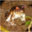

In [12]:
single_image = x_train[0]
single_image

In [13]:
# Check the shape of the single image
single_image.shape

(32, 32, 3)

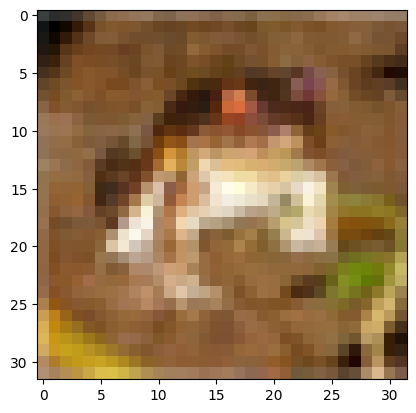

In [14]:
# plot the first image in the training data
plt.imshow(single_image)

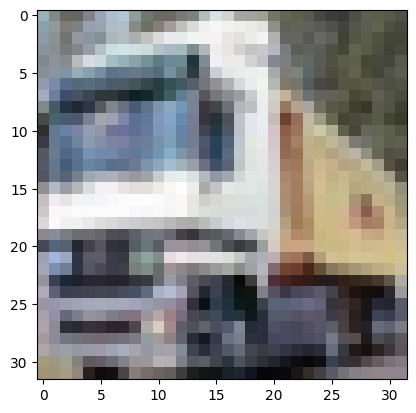

In [15]:
# plot the second image in the training data
plt.imshow(x_train[1])

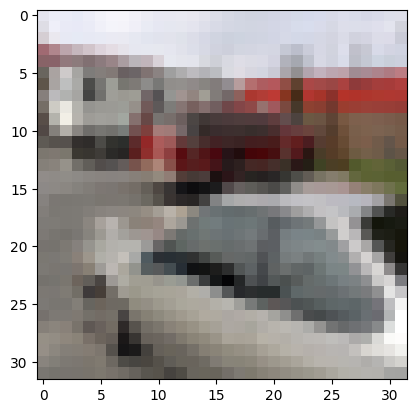

In [16]:
# Plot the last image in the training data
plt.imshow(x_train[-1])

# Pre-processing

In [17]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [18]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [19]:
# Check the shape of y_train
y_train.shape

(50000, 1)

In [20]:
# Check the shape of y_test
y_test.shape

(10000, 1)

# **Transforming Class Labels**
We will convert the class labels from integer vectors to binary class matrices, a process known as one-hot encoding.

In [21]:
y_cat_train = to_categorical(y_train, 10)
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
y_cat_test = to_categorical(y_test, 10)
y_cat_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

# Normalizing the data

In [23]:
# Check the maximum value in an image
single_image.max()

255

In [24]:
# Check the minimum value in an image
single_image.min()

0

# Scaling the images

In [25]:
# Divide the values by the maximum value to get the values between 0 and 1
x_train = x_train/255
x_test = x_test/255

In [26]:
# Check the values in the scaled image
scaled_image = x_train[0]
scaled_image

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [27]:
# Check the maximum value in the scaled image
scaled_image.max()

1.0

In [28]:
# Check the minimum value in the scaled image
scaled_image.min()

0.0

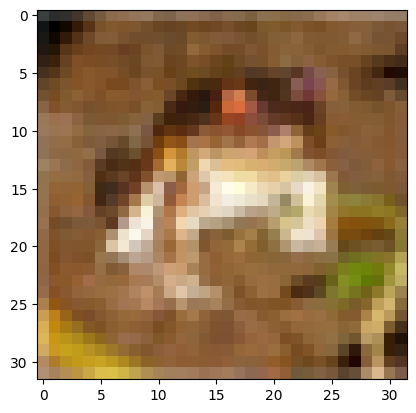

In [29]:
# Visualize the scaled image
plt.imshow(scaled_image)

# Reshaping the data
To make sure it's in the appropriate format for the model.

In [30]:
# Reshape the training data
x_train = x_train.reshape(50000, 32, 32, 3)

In [31]:
x_train.shape

(50000, 32, 32, 3)

In [32]:
# Reshape the testing data
x_test = x_test.reshape(10000, 32, 32, 3)

In [33]:
x_test.shape

(10000, 32, 32, 3)

# CNN Model Implementation

In [34]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Create the Model

In [51]:
# Create a sequential model
model= Sequential()

# Add the first convolutional layer with 32 filters, a kernel size of (3,3), and ReLU activation function
# Input shape is set to (32, 32, 3) indicating the input image dimensions (height, width, channels)
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu'))

# Add a max pooling layer with a pool size of (2,2) to downsample the spatial dimensions
model.add(MaxPool2D(pool_size=(3,3)))

# Adding the second convolutional layer with 32 filters, a kernel size of (3,3), and ReLU activation function
# Note: input_shape is not needed here, as Keras automatically infers it from the previous layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))

# Adding another max pooling layer with a pool size of (3,3)
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten the 2D output to a 1D array before passing it to the fully connected layers
model.add(Flatten())

# Add a dense (fully connected) layer with 128 neurons and ReLU activation function
model.add(Dense(128, activation='relu'))

# Add the final dense layer with 10 neurons (for 10 classes in a classification task) and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the Model

In [52]:
# Compile the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [53]:
# Print the summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 10, 10, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 4, 4, 32)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 128)              

# Train the Model

In [54]:
# Train the model on the training data for 3 epochs
model.fit(x_train, y_cat_train, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 8s 4ms/step - loss: 1.5275 - accuracy: 0.4482
Epoch 2/3
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1998 - accuracy: 0.5763
Epoch 3/3
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0656 - accuracy: 0.6243


In [55]:
model.metrics_names

['loss', 'accuracy']

# Evaluating the Model

In [56]:
# Evaluate the trained model on the test data
test_loss, test_acc = model.evaluate(x_test, y_cat_test)
# print the evaluation metrics
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.0074 - accuracy: 0.6470
Test loss: 1.007416844367981
Test accuracy: 0.6470000147819519


# Making predictions on test data using the trained Model

In [57]:
from sklearn.metrics import classification_report

# Get predictions for the test data
predictions = model.predict(x_test)
predictions

313/313 [==============================] - 1s 2ms/step


array([[4.6243831e-03, 4.1476861e-04, 4.9662724e-02, ..., 2.2263264e-03,
        2.8005287e-02, 1.0601891e-03],
       [2.0544443e-02, 6.1759514e-01, 8.7473112e-05, ..., 5.8479613e-06,
        3.3236802e-01, 2.9201450e-02],
       [1.4005971e-01, 1.3526034e-01, 8.2166046e-03, ..., 5.6079552e-03,
        5.7726306e-01, 1.1042240e-01],
       ...,
       [9.5805641e-05, 1.4330782e-05, 3.7820783e-01, ..., 3.5743270e-02,
        3.2542602e-04, 4.2917169e-04],
       [2.2173841e-02, 1.9106323e-02, 1.1441664e-01, ..., 3.8659982e-02,
        5.6642841e-04, 1.9923376e-03],
       [8.1901337e-05, 2.1847898e-04, 2.4866692e-03, ..., 8.9062774e-01,
        2.0267207e-05, 2.0815464e-04]], dtype=float32)

In [58]:
# Extract the predicted classes (class with the highest probability) from the predicted probabilities
prediction_classes = np.argmax(predictions, axis=1)
prediction_classes

array([3, 1, 8, ..., 5, 4, 7])

In [59]:
# Generate a classification report
report = classification_report(y_test, prediction_classes)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.63      0.69      1000
           1       0.79      0.76      0.77      1000
           2       0.54      0.49      0.52      1000
           3       0.47      0.41      0.44      1000
           4       0.57      0.57      0.57      1000
           5       0.50      0.58      0.54      1000
           6       0.66      0.79      0.72      1000
           7       0.75      0.69      0.72      1000
           8       0.73      0.79      0.76      1000
           9       0.71      0.76      0.73      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000




# Enhancing the Model's Performance
To enhance our model, we'll implement the following modifications:

 **Adjust Convolutional Layers:** Increase the filter count in the convolutional layers from 32 to 64, aiming to capture more detailed features within the images.

**Modify Pooling Layer:** Alter the pool size in the second convolutional layer to (2,2) for a more effective downsampling of the feature maps.

**Extended Training Duration:** Train the model over 10 epochs to provide it with more opportunities to learn from the training data.

In [60]:
# Create a sequential model
model= Sequential()

# Add the first convolutional layer with 64 filters, a kernel size of (3,3), and ReLU activation function
# Input shape is set to (32, 32, 3) indicating the input image dimensions (height, width, channels)
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu'))

# Add a max pooling layer with a pool size of (2,2) to downsample the spatial dimensions
model.add(MaxPool2D(pool_size=(2,2)))

# Adding the second convolutional layer with 64 filters, a kernel size of (3,3), and ReLU activation function
# Note: input_shape is not needed here, as Keras automatically infers it from the previous layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

# Adding another max pooling layer with a pool size of (3,3)
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten the 2D output to a 1D array before passing it to the fully connected layers
model.add(Flatten())

# Add a dense (fully connected) layer with 128 neurons and ReLU activation function
model.add(Dense(128, activation='relu'))

# Add the final dense layer with 10 neurons (for 10 classes in a classification task) and softmax activation
model.add(Dense(10, activation='softmax'))

Compiling the Model

In [61]:
# Compile the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [62]:
# print the summary of the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 2304)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

# Training the Model on 10 epochs

In [63]:
# Train the model on the training data for 10 epochs
model.fit(x_train, y_cat_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4743 - accuracy: 0.4702
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1128 - accuracy: 0.6084
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9784 - accuracy: 0.6582
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8881 - accuracy: 0.6905
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8198 - accuracy: 0.7118
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7644 - accuracy: 0.7333
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7147 - accuracy: 0.7497
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6658 - accuracy: 0.7676
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6261 - accuracy: 0.7814
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.586

Evaluating the Model Performence

In [64]:
# Evaluate the trained model on the test data
test_loss, test_acc = model.evaluate(x_test, y_cat_test)
# print the evaluation metrics
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.9088 - accuracy: 0.6981
Test loss: 0.9088119268417358
Test accuracy: 0.6980999708175659


# Generating Predictions with the Improved Model
After training the improved model, we will use it to make predictions on the test dataset to evaluate its performance on unseen data.

In [65]:
from sklearn.metrics import classification_report

# Get predictions for the test data
predictions = model.predict(x_test)

# Extract the predicted classes (class with the highest probability) from the predicted probabilities
prediction_classes = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 2ms/step


In [66]:
# Generate a classification report
report = classification_report(y_test, prediction_classes)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1000
           1       0.79      0.81      0.80      1000
           2       0.61      0.56      0.58      1000
           3       0.53      0.48      0.51      1000
           4       0.66      0.66      0.66      1000
           5       0.67      0.55      0.61      1000
           6       0.70      0.82      0.76      1000
           7       0.74      0.75      0.74      1000
           8       0.72      0.85      0.78      1000
           9       0.78      0.77      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.69      0.70      0.69     10000
weighted avg       0.69      0.70      0.69     10000



# To further improve the model by adding Dropout layers

In [67]:
from tensorflow.keras.layers import Dropout

In [68]:
# Create a sequential model
model= Sequential()

# Add the first convolutional layer with 64 filters, a kernel size of (3,3), and ReLU activation function
# Input shape is set to (32, 32, 3) indicating the input image dimensions (height, width, channels)
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu'))

# Add a dropout layer with a rate of 0.25
model.add(Dropout(0.25))

# Add a max pooling layer with a pool size of (2,2) to downsample the spatial dimensions
model.add(MaxPool2D(pool_size=(2,2)))

# Adding the second convolutional layer with 64 filters, a kernel size of (3,3), and ReLU activation function
# Note: input_shape is not needed here, as Keras automatically infers it from the previous layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

# Add a dropout layer with a rate of 0.25
model.add(Dropout(0.25))

# Adding another max pooling layer with a pool size of (3,3)
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten the 2D output to a 1D array before passing it to the fully connected layers
model.add(Flatten())

# Add a dense (fully connected) layer with 128 neurons and ReLU activation function
model.add(Dense(128, activation='relu'))

# Add a dropout layer with a rate of 0.25
model.add(Dropout(0.25))

# Add the final dense layer with 10 neurons (for 10 classes in a classification task) and softmax activation
model.add(Dense(10, activation='softmax'))

In [69]:
# Compile the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [70]:
# Print a summary of the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 dropout (Dropout)           (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                

In [71]:
# Train the model on the training data for 10 epochs
model.fit(x_train, y_cat_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4741 - accuracy: 0.4674
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1430 - accuracy: 0.5994
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0315 - accuracy: 0.6401
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9416 - accuracy: 0.6673
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8895 - accuracy: 0.6859
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8313 - accuracy: 0.7066
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7876 - accuracy: 0.7213
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7465 - accuracy: 0.7383
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7185 - accuracy: 0.7447
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.684

# Evaluating the Model performance


In [72]:
# Evaluate the trained model on the test data
test_loss, test_acc = model.evaluate(x_test, y_cat_test)
# print the evaluation metrics
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.8487 - accuracy: 0.7105
Test loss: 0.8487224578857422
Test accuracy: 0.7105000019073486


In [73]:
from sklearn.metrics import classification_report

# Get predictions for the test data
predictions = model.predict(x_test)

# Extract the predicted classes (class with the highest probability) from the predicted probabilities
prediction_classes = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 3ms/step


In [74]:
# Generate the classification report
report = classification_report(y_test, prediction_classes)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1000
           1       0.91      0.74      0.81      1000
           2       0.69      0.53      0.60      1000
           3       0.55      0.49      0.52      1000
           4       0.59      0.70      0.64      1000
           5       0.60      0.64      0.62      1000
           6       0.73      0.84      0.78      1000
           7       0.78      0.75      0.76      1000
           8       0.75      0.87      0.80      1000
           9       0.80      0.80      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



# Conclusion

The overall accuracy of the model on the test data is **71%**, which suggests a good level of generalization given that CIFAR-10 is a relatively complex dataset with 10 different classes.

The precision, recall, and F1-score are fairly consistent across classes, with each metric having a macro and weighted average of **71%**. This consistency implies that the model doesn't heavily favor any particular class and is relatively stable across different types of images.

**Class 1** (automobile) has the highest precision at **91%**, meaning that when the model predicts an image as an automobile, it is correct 91% of the time.

**Class 8** (ship) has the highest recall at **87%**, indicating that it successfully identifies 87% of all ships in the test set.

**Class 9** (truck) shows the highest F1-score at **80%**, reflecting a strong balance between precision and recall for this class.

The lowest recall is observed for** class 3** (cat) at **49%**, suggesting that almost half of the cat images are being missed by the model. This could be a point of focus for future improvements.

Classes like cats (3) and birds (2) have lower F1-scores compared to others, hinting that the model might be confusing these classes with others or that these classes are more challenging for the model to learn.

The addition of dropout layers appears to have mitigated overfitting to some extent, as evidenced by the relatively balanced precision and recall across most classes.

 However, there may still be room for optimization, particularly for classes where the model's recall is less than **60%**.

*Further model tuning, data augmentation, or even more sophisticated regularization techniques could potentially improve these metrics.*